# Stage 1 : Exploratory Data Analysis

## 1.1 Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
pal = sns.color_palette()

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')

In [3]:
df

Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0             0                     68.95   35  432837300.0   
1             1                     80.23   31  479092950.0   
2             2                     69.47   26  418501580.0   
3             3                     74.15   29  383643260.0   
4             4                     68.37   35  517229930.0   
..          ...                       ...  ...          ...   
995         995                     72.97   30  499691990.0   
996         996                     51.30   45  474475190.0   
997         997                       NaN   51  296910040.0   
998         998                     55.55   19  293445530.0   
999         999                     45.01   26  209130600.0   

     Daily Internet Usage       Male        Timestamp Clicked on Ad  \
0                  256.09  Perempuan   3/27/2016 0:53            No   
1                  193.77  Laki-Laki    4/4/2016 1:39            No   
2                  236.50  Perempuan  3/13/2016 20:35            No   
3                  245.89  Laki-Laki   1/10/2016 2:31            No   
4                  225.58  Perempuan    6/3/2016 3:36            No   
..                    ...        ...              ...           ...   
995                208.58  Laki-Laki  2/11/2016 21:49           Yes   
996                134.42  Laki-Laki   4/22/2016 2:07           Yes   
997                120.37  Laki-Laki   2/1/2016 17:24           Yes   
998                187.95  Perempuan   3/24/2016 2:35            No   
999                178.35  Perempuan   6/3/2016 21:43           Yes   

              city                       province    category  
0    Jakarta Timur  Daerah Khusus Ibukota Jakarta   Furniture  
1         Denpasar                           Bali        Food  
2         Surabaya                     Jawa Timur  Electronic  
3            Batam                 Kepulauan Riau       House  
4            Medan                  Sumatra Utara     Finance  
..             ...                            ...         ...  
995       Semarang                    Jawa Tengah     Finance  
996      Pakanbaru                           Riau  Electronic  
997      Samarinda               Kalimantan Timur      Travel  
998      Tangerang                         Banten        Bank  
999         Serang                         Banten      Travel  

[1000 rows x 11 columns]

## 1.2 Descriptive Statistics

### a. Missing Value

In [4]:
#General information & missing value check 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


### b. Duplicate Value Check

In [5]:
df.duplicated().sum()

0

### c. Statistical Summary 

In [6]:
df.describe()

Unnamed: 0  Daily Time Spent on Site          Age   Area Income  \
count  1000.000000                987.000000  1000.000000  9.870000e+02   
mean    499.500000                 64.929524    36.009000  3.848647e+08   
std     288.819436                 15.844699     8.785562  9.407999e+07   
min       0.000000                 32.600000    19.000000  9.797550e+07   
25%     249.750000                 51.270000    29.000000  3.286330e+08   
50%     499.500000                 68.110000    35.000000  3.990683e+08   
75%     749.250000                 78.460000    42.000000  4.583554e+08   
max     999.000000                 91.430000    61.000000  5.563936e+08   

       Daily Internet Usage  
count            989.000000  
mean             179.863620  
std               43.870142  
min              104.780000  
25%              138.710000  
50%              182.650000  
75%              218.790000  
max              267.010000

## 1.3 Univariate Analysis

In [7]:
#select dtypes object
obj = df.select_dtypes(include='object').columns
obj

Index(['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category'], dtype='object')

In [8]:
#select dtypes int & float
num = df.select_dtypes(include=['int64','float64']).columns
num

Index(['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage'],
      dtype='object')

In [9]:
#change variable cat & num
categoricals = obj
numericals = num

In [10]:
#check len
print(len(categoricals))
print(len(numericals))

6
5


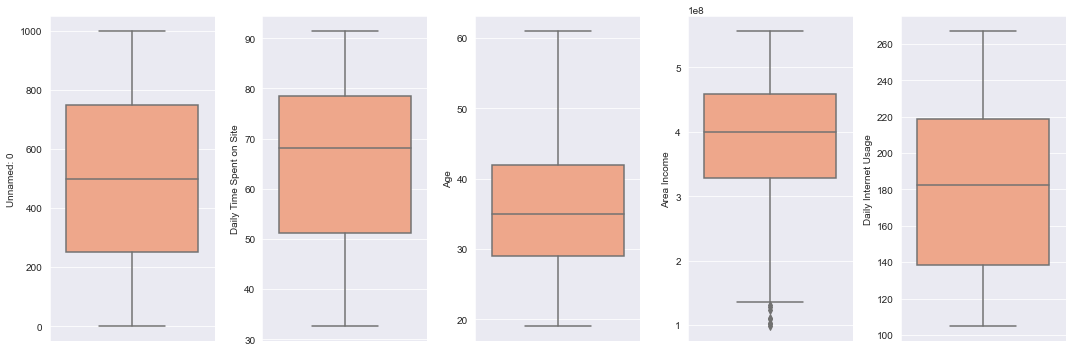

In [11]:
#looping for univariate analysis
plt.figure(figsize=(15,5))

#boxplot
for i in range(len(numericals)):
    plt.subplot(1,5,i+1)
    sns.boxplot(y=df[numericals[i]],color='lightsalmon')
    plt.tight_layout()

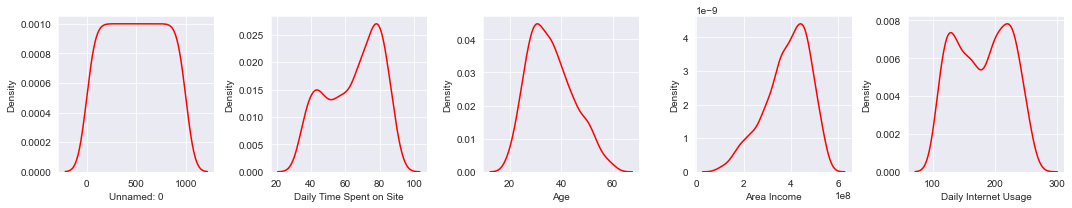

In [12]:
#Distrbution Plot

plt.figure(figsize=(15,3))

for i in range(len(numericals)):
    plt.subplot(1,5,i+1)
    sns.kdeplot(x=df[numericals[i]],color='r')
    plt.xlabel(numericals[i])
    plt.tight_layout()

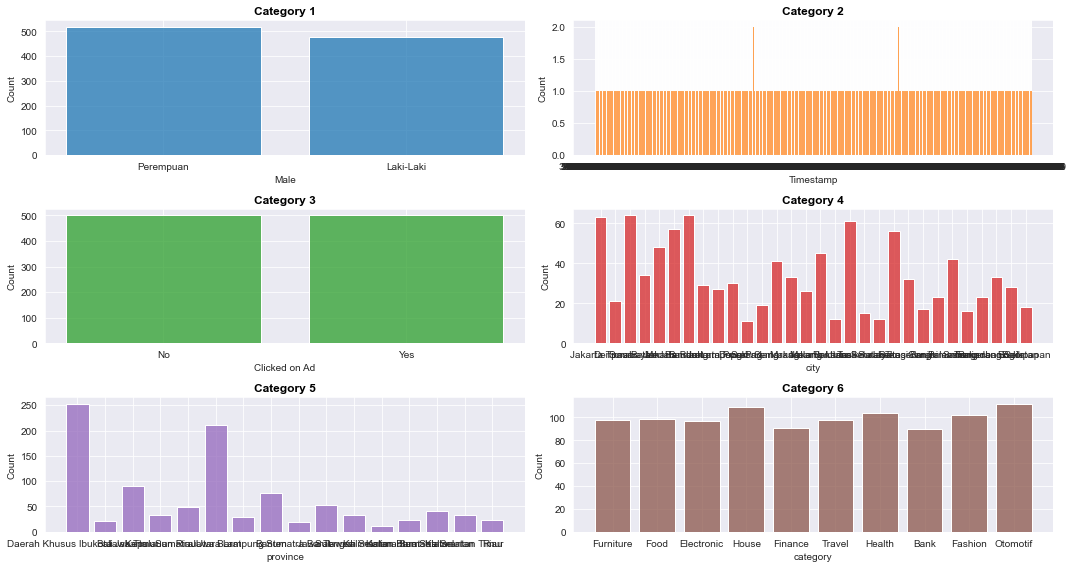

In [13]:
#Count Plot

plt.figure(figsize=(15,8))
title = ['Category 1','Category 2','Category 3','Category 4','Category 5','Category 6']

for i in range(len(categoricals)):
    plt.subplot(3,2,i+1)
    sns.histplot(df[categoricals[i]],color=pal[i],shrink=0.8)
    plt.title(title[i],fontweight='bold',fontsize=12,color='black')
    plt.tight_layout()

## Bivariate Analysis

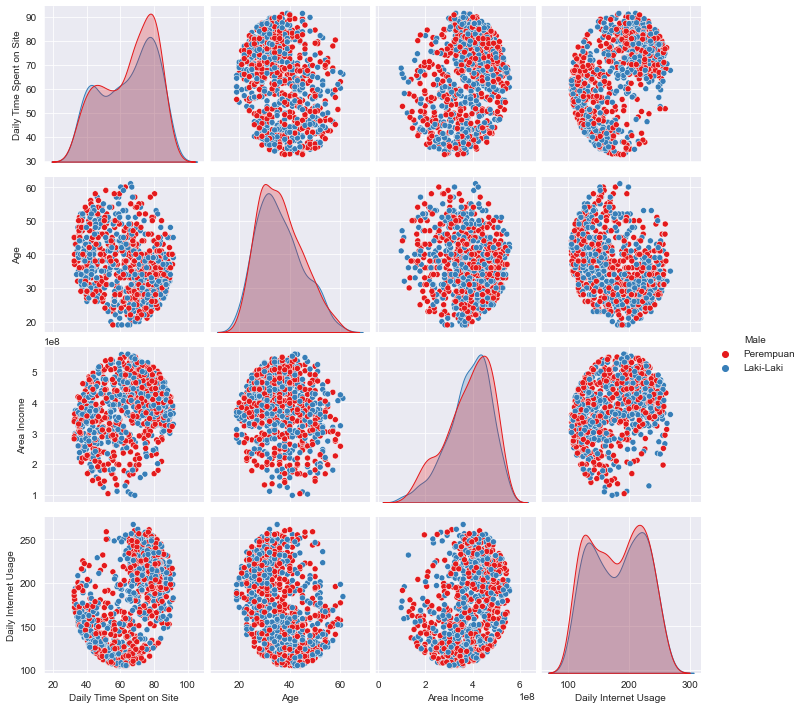

In [23]:
# Scatter plot
df2 = df.drop('Unnamed: 0', axis = 1)
sns.pairplot(df2, diag_kind='kde', hue='Male',palette='Set1')
plt.show()

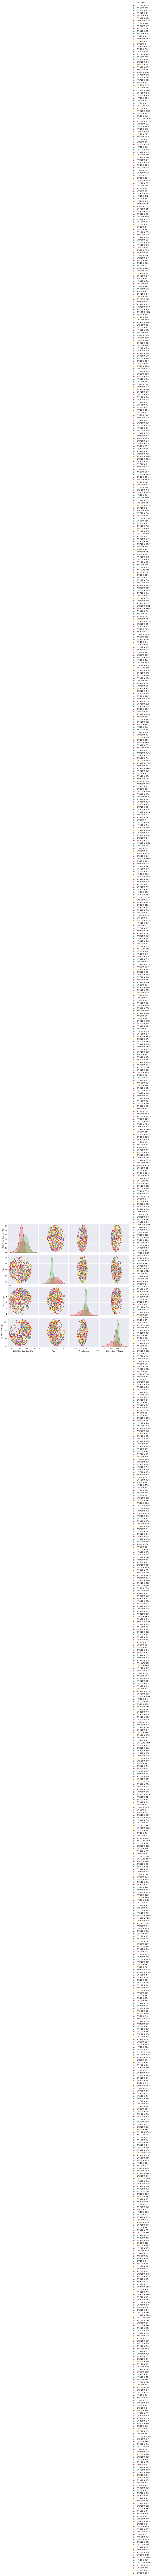

In [15]:
# Scatter plot
# df2 = df.drop('Unnamed: 0', axis = 1)
sns.pairplot(df2, diag_kind='kde', hue='Timestamp',palette='Set1')
plt.show()

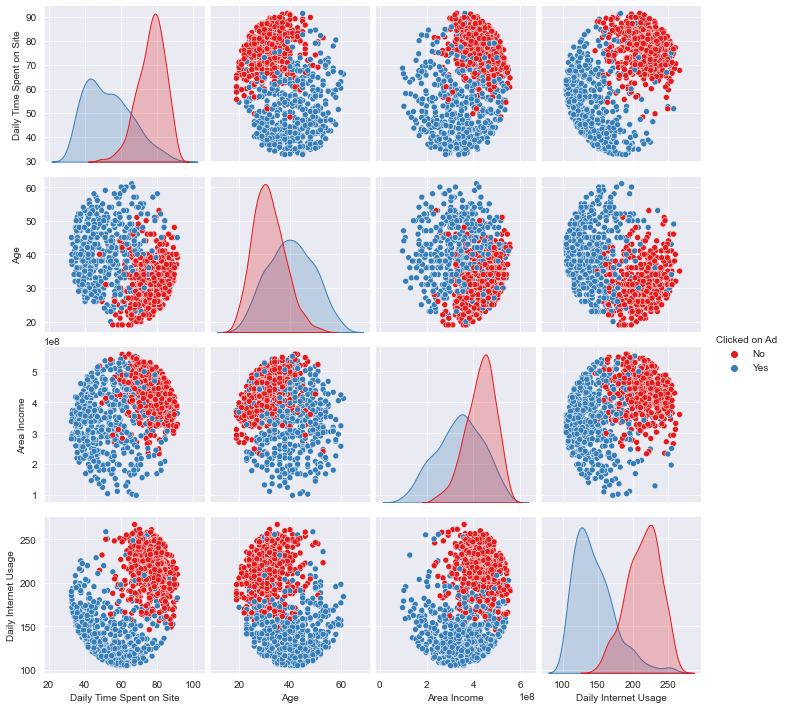

In [16]:
# Scatter plot
# df2 = df.drop('Unnamed: 0', axis = 1)
sns.pairplot(df2, diag_kind='kde', hue='Clicked on Ad',palette='Set1')
plt.show()

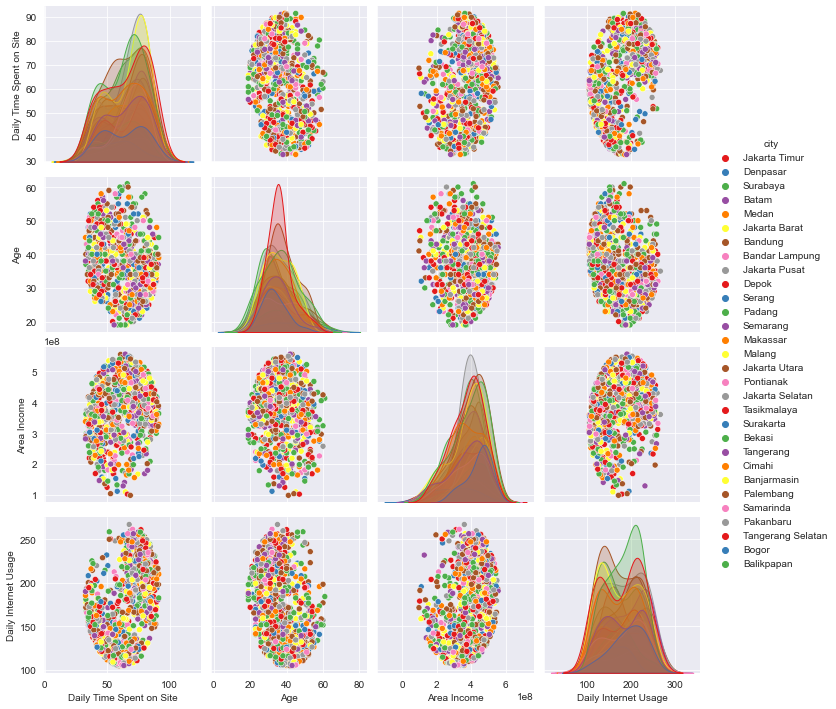

In [17]:
# Scatter plot
# df2 = df.drop('Unnamed: 0', axis = 1)
sns.pairplot(df2, diag_kind='kde', hue='city',palette='Set1')
plt.show()

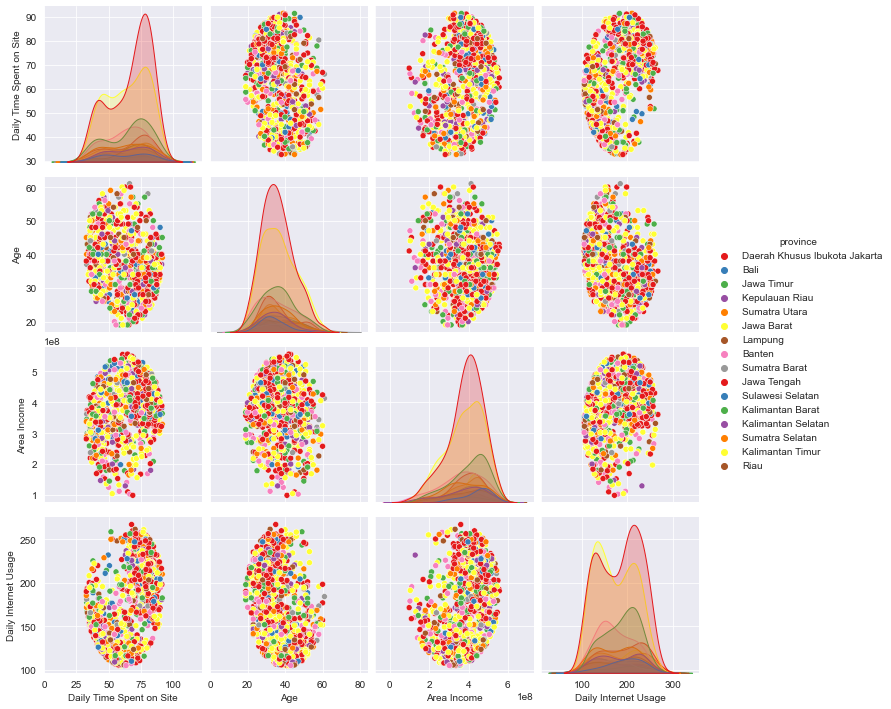

In [18]:
# Scatter plot
# df2 = df.drop('Unnamed: 0', axis = 1)
sns.pairplot(df2, diag_kind='kde', hue='province',palette='Set1')
plt.show()

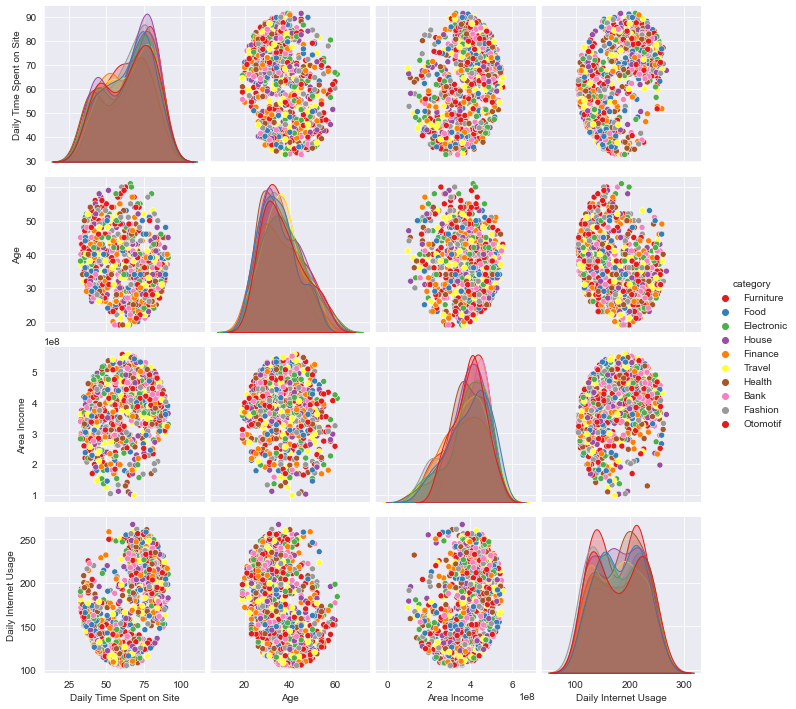

In [19]:
# Scatter plot
# df2 = df.drop('Unnamed: 0', axis = 1)
sns.pairplot(df2, diag_kind='kde', hue='category',palette='Set1')
plt.show()

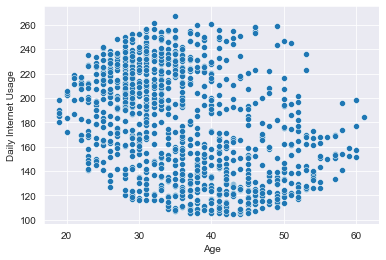

In [36]:
sns.scatterplot(x='Age', y='Daily Internet Usage', data=df2)
plt.show()

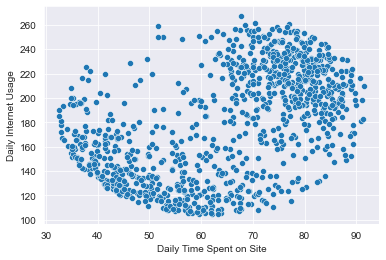

In [35]:
sns.scatterplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=df2)
plt.show()

## 1.4 Multivariate Analysis

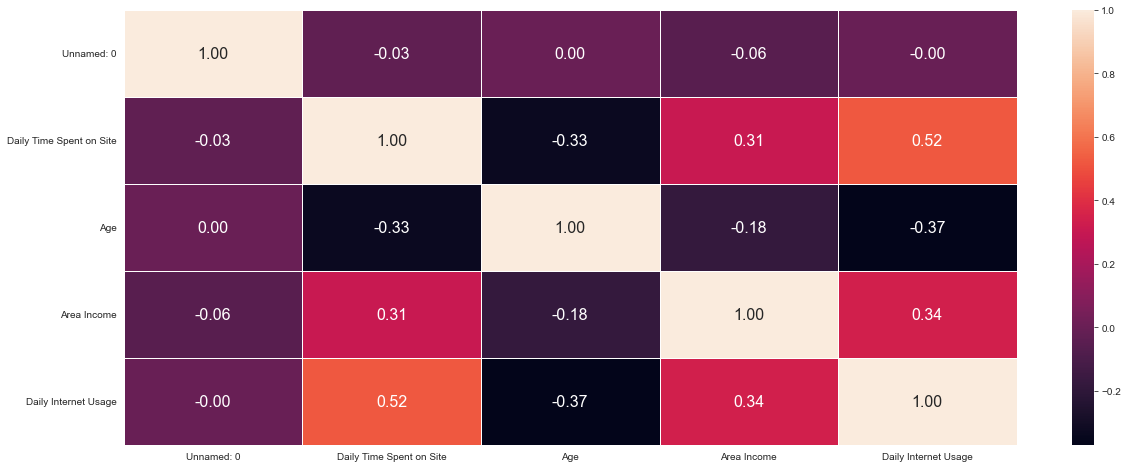

In [21]:
#multivariate analysis

plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',annot_kws={'fontsize': 16},linewidths=.5)
plt.yticks(rotation=0)
plt.show()

## 1.5 Business Insight

In [22]:
df['city'].unique()

array(['Jakarta Timur', 'Denpasar', 'Surabaya', 'Batam', 'Medan',
       'Jakarta Barat', 'Bandung', 'Bandar Lampung', 'Jakarta Pusat',
       'Depok', 'Serang', 'Padang', 'Semarang', 'Makassar', 'Malang',
       'Jakarta Utara', 'Pontianak', 'Jakarta Selatan', 'Tasikmalaya',
       'Surakarta', 'Bekasi', 'Tangerang', 'Cimahi', 'Banjarmasin',
       'Palembang', 'Samarinda', 'Pakanbaru', 'Tangerang Selatan',
       'Bogor', 'Balikpapan'], dtype=object)